# Informe del experimento con el tubo escintilador:

#### David García Gómez
#### Juan Montoya Sánchez

## Resumen:

Se tomaron datos de conteo en un equipo que mide radiación utilizando como objeto experimental la radiación de fondo para contar en cuanto tiempo ocurren tres eventos. Y luego, después de hayar la media con 10 datos experimentales de el tiempo que demora en contar tres eventos, utilizar el tiempo medio para tomar treinta datos de cuántos eventos suceden en este intervalo de tiempo y analizar qué distribución siguen los datos obtenidos.

## Introducción:

Las distribuciones estadísticas son de vital importancia en el estudio de sistemas macroscópicos en los que no podemos tener en cuenta todas las variables que el proceso intrísecamente presenta. Para afrontarnos a este tipo de problemas, se deben estudiar los sistemas desde la toma experimental de datos de los fenómenos para poder realizar una buena inferencia estadística para obtener información confiable, y que nos permita realizar predicciones a cerca del proceso o fenómeno con cierta "fiabilidad". 

Según Sirca (Probability for Physicist, 2016, pag 3), "Puede suceder que múltiples repeticiones del experimento con la misma entrada y bajo condiciones externas iguales resulten en diferentes resultados. La característica principal de un experimento aleatorio es, por lo tanto, nuestra incapacidad para predecir de manera única el estado final preciso basado en los datos de entrada. Más bien, nos preguntamos sobre la frecuencia de ocurrencia de un estado final específico con respecto al número de ensayos". Esta frecuencia de ocurrencia nos permite sacar conclusiones estadísticas que dependen de la cantidad de repeticiones del experimento, de la estructura del experimento,  de si los experimentos están relacionados entre sí o no, etc. Y todos estos factores, definen el tipo de distribución que pueda presentar el experimento y también qué información puede extraerse y con cuanta fiabilidad.

Según Leo, W. R. (Techniques for nuclear and particle physics experiments, 1994, pag 149), "Sin duda la escintilación o centelleo, es una de las técnicas más usadas hoy en día en el mundo de la física nuclear y de partículas. Usa el hecho de que cuando ciertos materiales son golpeados por alguna partícula nuclear o radiación, emite un pequeño rayo de luz. Al acoplarse a otro dispositivo como un fotomultiplicador, estos centelleos pueden ser convertidos en pulsos eléctricos que podemos analizar y contar, dándonos información sobre la radiación incidente".

En este caso, el experimento realizado consiste ver cuántos segundos demora el tubo escintilador, en contar tres eventos a través de una muestra de diez experimentos del cual se extrae la media. Luego este valor medio del tiempo que tarda en registrar tres eventos, se usa para contar cuántos eventos ocurren en este lapso de tiempo. Este experimento se repitió 31 veces para el tubo escintilador sin ninguna muestra radioactiva cerca, y luego con una pequeña barra de material radioactivo (del que posiblemente todos sus elementos radiactivos ya hubieran decaido). 


## Desarrollo

En el laboratorio, se nos entregó un dispositivo de conteo que utilizaba un tubo escintilador para detectar eventos de radiación, junto con un cronómetro, con el cual se nos pedía tomar datos de los eventos contados por el dispositivo interactuando con la radiación de fondo, o sea, sin ninguna muestra radioactiva cerca y luego con una pequeña barra de material radioactivo.

Para poder evidenciar qué distribución sigue un histograma de frecuencias de los eventos, (eventos ocurridos en un periodo de tiempo determinado). Primero se hicieron 10 experimentos en los que se contó el tiempo necesario para que el dispositivo contara tres eventos y así poder hallar un valor medio. Luego, este valor medio hallado, se utilizó como tiempo fijo para contar cuántos eventos ocurrian durante 31 experimentos. tanto para la radiación de fondo como cuando se tenía cerca la barra de material radioactivo.

En el siguiente par de lineas de código, se importan las librerías y métodos a utilizar para la organización y análisis de los datos tomados:

In [148]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt, e, power,array, arange, sum, zeros
import math
import matplotlib.pyplot  as plt
from scipy.special import factorial
from scipy.optimize import curve_fit

def poisson(x, lamda):
    x = array(x)  # Ensures x is a NumPy array
    return (power(lamda, x) / factorial(x)) * exp(-lamda)

### Datos

In [149]:
# Tiempo que tarda en contar tres eventos

Tiempo=[9.86,1.89,8.59,1.52,4.49,4.40,4.55,5.05,1.06,1.72]

#Número de conteos en cuatro segundos sin la muestra
Conteo1=[4,6,1,2,6,6,6,2,4,2,7,3,6,4,3,5,1,4,2,3,3,3,2,0,1,5,5,4,2,3,3]

#Número de conteos en cuatro segundos con la muestra

Conteo2=[2,3,5,5,3,5,5,1,4,5,2,2,4,2,8,5,4,2,4,4,4,7,5,3,3,3,6,3,2,3,6]

### Histograma:

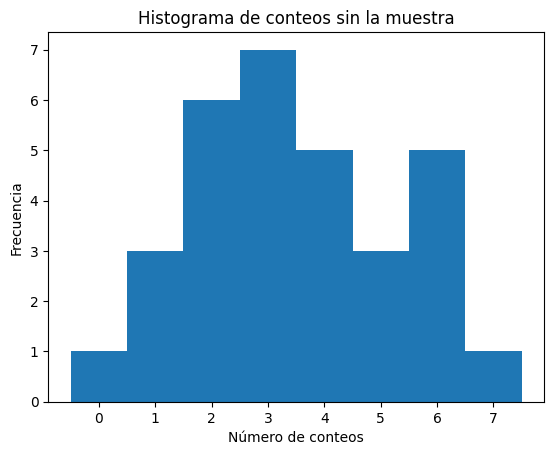

In [150]:
y, x, _ = plt.hist(Conteo1, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.close()
plt.bar(x[:-1], y, width=1)
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos sin la muestra')
plt.show()

### Comparación de los datos con el ajuste para el experimento sin muestra:

mej_val: [2.97215263]
[[706.3386206]]
[26.57703182]


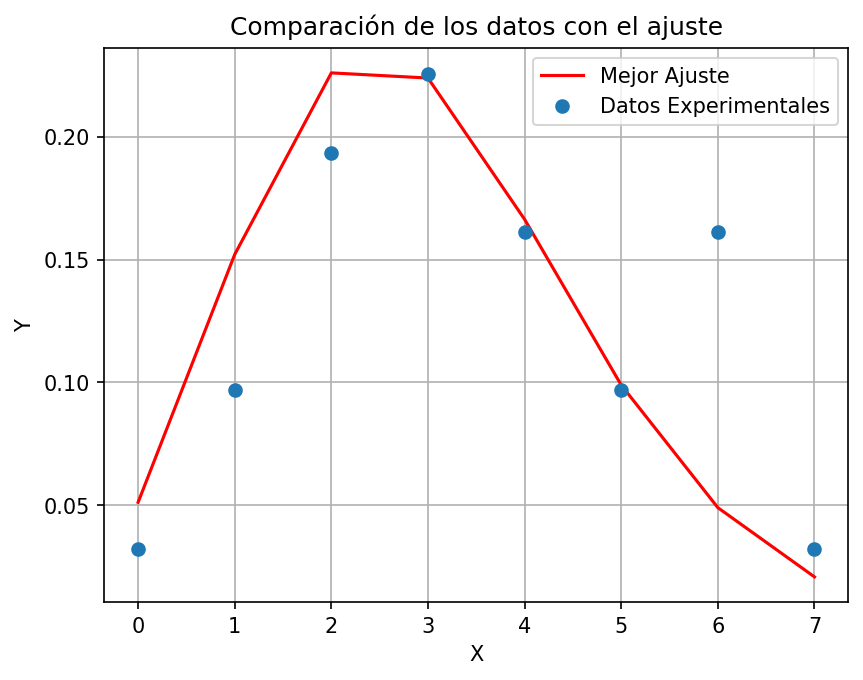

In [151]:
#Se hace que los arreglos de X y Y tengan la misma dimensión:

x = [x for x in range(len(y))]

val_ini = mean(y)
mej_val, cov = curve_fit(poisson,x,y,val_ini)
print('mej_val: {}'.format(mej_val))
print(cov)
perr = sqrt(diag(cov))
print(perr)
yaj=poisson(x,mej_val)
plt.figure(dpi=150)
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y/sum(y), 'o', label='Datos Experimentales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Determinar la bondad del ajuste.

Para obtener chi cuadrado, debemos dividir nuestros datos en intervalos o "bins", cada uno representando un posible rango de valores de los datos. La cantidad de datos individuales en cada intervalo representa las frecuencias de ocurrencia para ese rango de valores. Para esta División, podemos usar la funcion de matplotlib hist. Esta funcion usa los datos de entrada, y realiza un histograma de estos dividiéndolos en un numero definido de intervalos. El número de intervalos lo debemos elegir de manera que no haya ninguna con menos de 5 cuentas. Este valor será llamado nbin. También se debe elegir el rango de los intervalos, de modo que cubran todo el rango de los datos. A este rango lo llamaremos yran.

Este proceso lo hacemos para los datos experimentales y los datos de la curva de ajuste obtenida. Con las frecuencias de estos dos sets, podemos calcular chi cuadrada con la funcion chi_square. El número de intervalos usados será nuestro número de grados de libertad para determinar si se cumple la hipótesis (si la curva de ajuste corresponde a los datos experimentales).

7
0.020810271014147286 0.22611154292276223
[0.02081027 0.05013902 0.07946778 0.10879653 0.13812528 0.16745404
 0.19678279 0.22611154]
[0.02081027 0.05013902 0.07946778 0.10879653 0.13812528 0.16745404
 0.19678279 0.22611154]
[2. 0. 2. 0. 2. 1. 1.]
[2. 1. 1. 0. 2. 0. 2.]
Chi cuadrado = 2.5


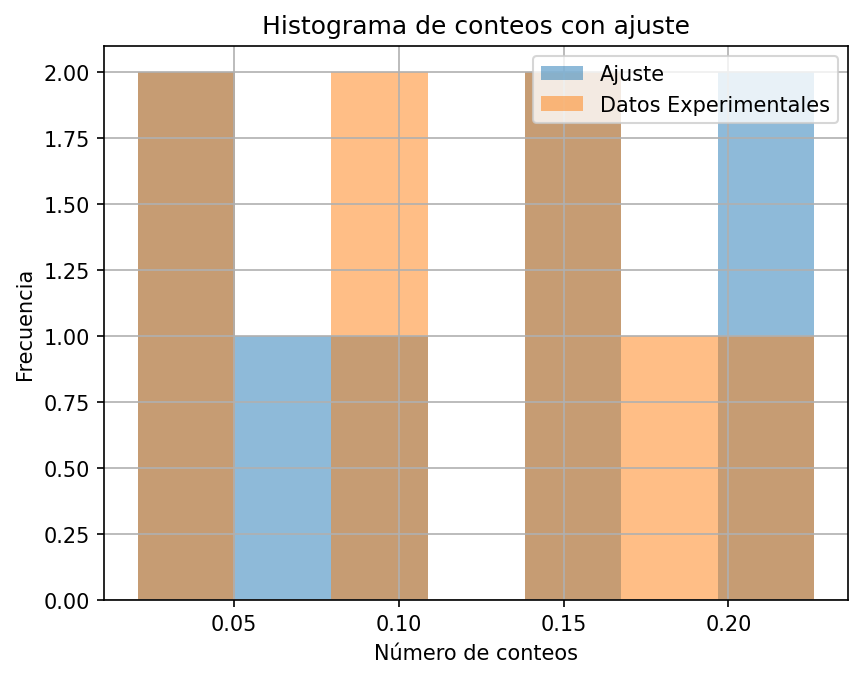

In [152]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbin = int(1 + 3.322 * log10(101))
print(nbin)

#Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
ymin, ymax = min(min(y/sum(y)), min(yaj)), max(max(y/sum(y)), max(yaj))
print(ymin, ymax)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
plt.figure(dpi=150)
[naj, baj, paj] = plt.hist(yaj, nbin, range=(ymin, ymax), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(y/sum(y), nbin, range=(ymin, ymax), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)


def chi_sqr(dathistexp, dathistaj):
    mask = dathistaj != 0
    dathistexp = dathistexp[mask]
    dathistaj = dathistaj[mask]
    return sum(((dathistexp - dathistaj)**2) / dathistaj)

print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))

plt.show()

Tenemos 7-1-3 grados de libertad, por que usamos 7 intervalos. De aquí se sigue que una probabilidad de 0.05 requerimos un chi cuadrado de 7.81. El valor obtenido es menor, por lo que no podemos rechazar el ajuste.!

In [153]:
def r_sqr(datexp,dataj):
    return 1-sum((datexp-dataj)**2)/sum((datexp-mean(datexp))**2)

print('R^2 = ', r_sqr(y,yaj))

R^2 =  -3.172406809170629


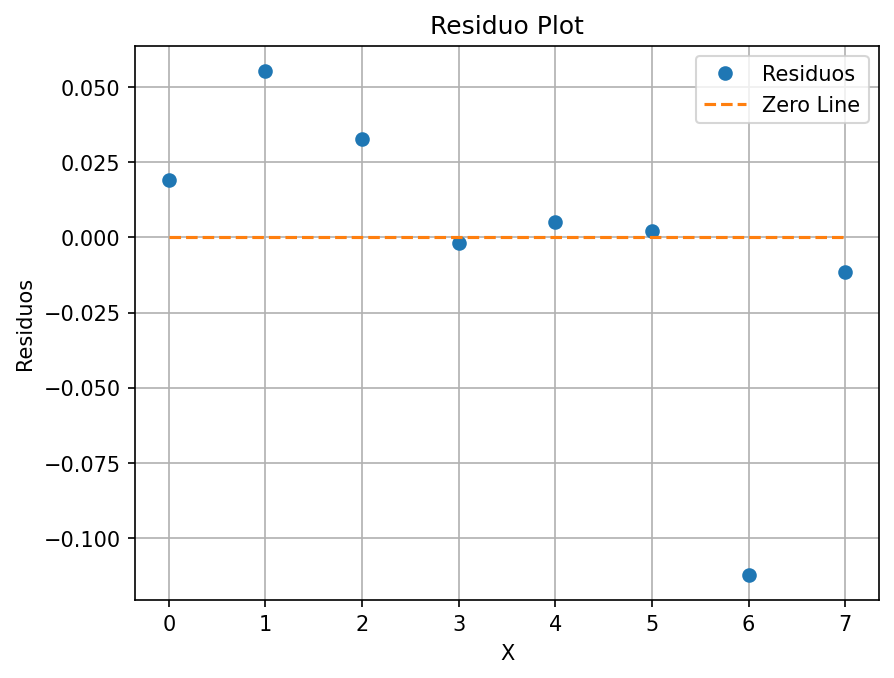

In [154]:
yres = yaj - y / sum(y)
yz = zeros(len(x))

plt.figure(dpi=150)
plt.plot(x, yres, 'o', label='Residuos')
plt.plot(x, yz, linestyle='--', label='Zero Line')

plt.xlabel('X')
plt.ylabel('Residuos')
plt.title('Residuo Plot')
plt.legend(loc='best')
plt.grid(True)

plt.show()


____________________

### Histograma del experimento con muestra:

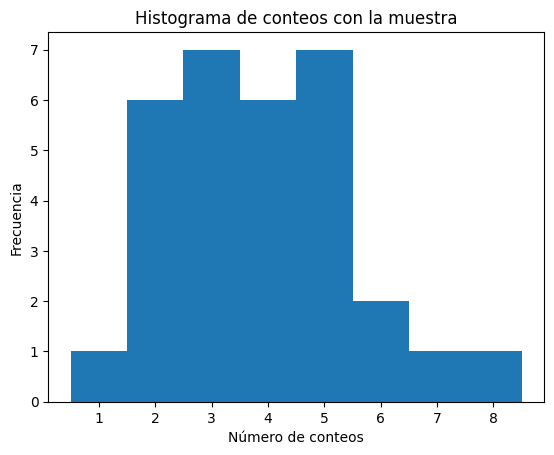

In [155]:
ym, xm, _ = plt.hist(Conteo2, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.close()
plt.bar(xm[:-1], ym, width=1)
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con la muestra')
plt.show()

### Comparación de los datos con el ajuste para el experimento sin muestra:

mej_val: [2.34560564]
[[547.14425143]]
[23.3911148]


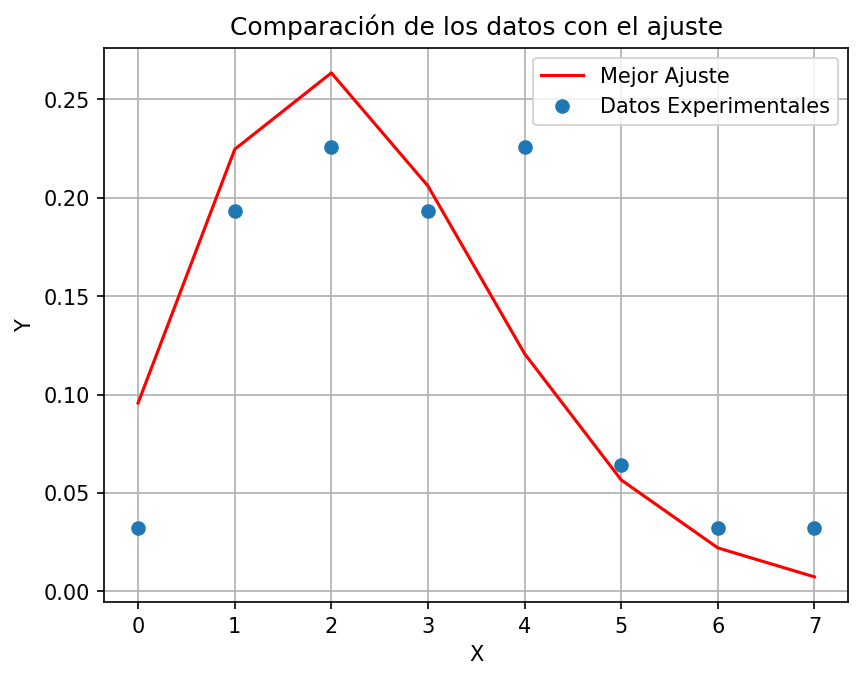

In [156]:
#Se hace que los arreglos de X ym Y tengan la misma dimensión:

xm = [xm for xm in range(len(ym))]

val_ini = mean(ym)
mej_val, cov = curve_fit(poisson,xm,ym,val_ini)
print('mej_val: {}'.format(mej_val))
print(cov)
perr = sqrt(diag(cov))
print(perr)
yajm=poisson(xm,mej_val)
plt.figure(dpi=150)
plt.plot(xm, yajm, 'r', label='Mejor Ajuste')
plt.plot(xm, ym/sum(ym), 'o', label='Datos Experimentales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()


7
0.007424562293270043 0.26350958242882067
[0.00742456 0.04400814 0.08059171 0.11717529 0.15375886 0.19034243
 0.22692601 0.26350958]
[0.00742456 0.04400814 0.08059171 0.11717529 0.15375886 0.19034243
 0.22692601 0.26350958]
[3. 1. 0. 0. 0. 4. 0.]
[2. 1. 1. 1. 0. 2. 1.]
Chi cuadrado = 5.5


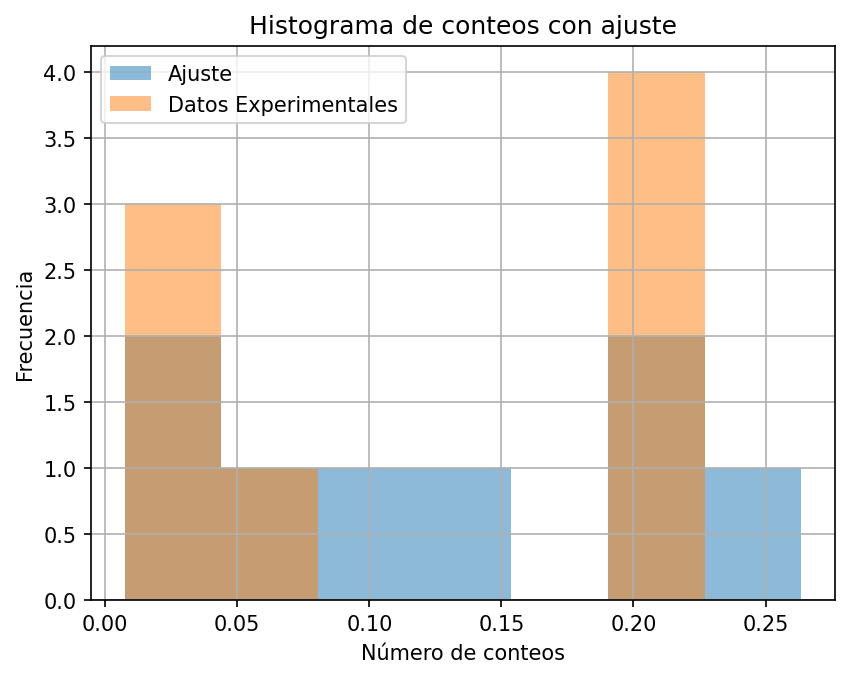

In [157]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101))
print(nbinm)

#Definimos un rango minimo ym maximo comun para los datos obtenidos experimentamente ym por medio del ajuste
yminm, ymaxm = min(min(ym/sum(ym)), min(yajm)), max(max(ym/sum(ym)), max(yajm))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
plt.figure(dpi=150)
[naj, baj, paj] = plt.hist(yajm, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(ym/sum(ym), nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)


def chi_sqr(dathistexp, dathistaj):
    mask = dathistaj != 0
    dathistexp = dathistexp[mask]
    dathistaj = dathistaj[mask]
    return sum(((dathistexp - dathistaj)**2) / dathistaj)

print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))

plt.show()

Tenemos 7-1-3 grados de libertad, por que usamos 7 intervalos. De aquí se sigue que una probabilidad de 0.05 requerimos un chi cuadrado de 7.81. El valor obtenido es menor, por lo que no podemos rechazar el ajuste.!

In [158]:
print('R^2 = ', r_sqr(ym,yajm))

R^2 =  -1.921552962853231


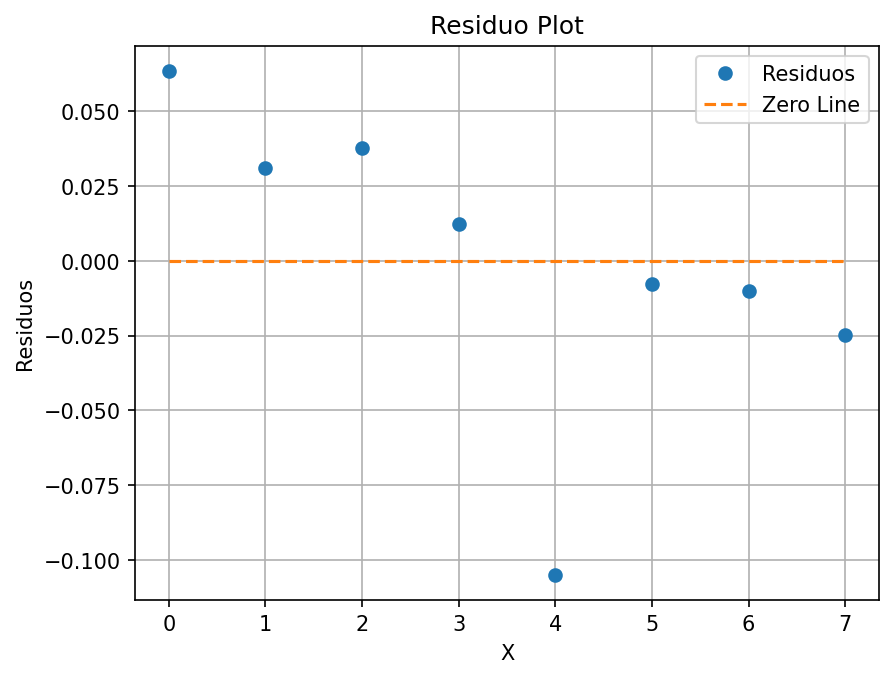

In [159]:
yresm = yajm - ym / sum(ym)
yzm = zeros(len(xm))

plt.figure(dpi=150)
plt.plot(xm, yresm, 'o', label='Residuos')
plt.plot(xm, yzm, linestyle='--', label='Zero Line')

plt.xlabel('X')
plt.ylabel('Residuos')
plt.title('Residuo Plot')
plt.legend(loc='best')
plt.grid(True)

plt.show()


## Conclusion
Los datos experimentales con y sin la muestra radioactiva, siguen una distribución de Poisson. O almenos los test de hipotesis no nos perimiter negar que sean esas distribuciones. Si presentan diferencias en el valor de lambda, en chi cuadrado y en las graficas de residuos, lo cual se podria interpretar como que la muestra radioactiva afecta la distribución de los eventos. Pese a que esto ya fue enseñado de froma secuencial a lo largo de este notebook. Vamos a volver a poner esas imagenes para que se vea de forma mas clara.

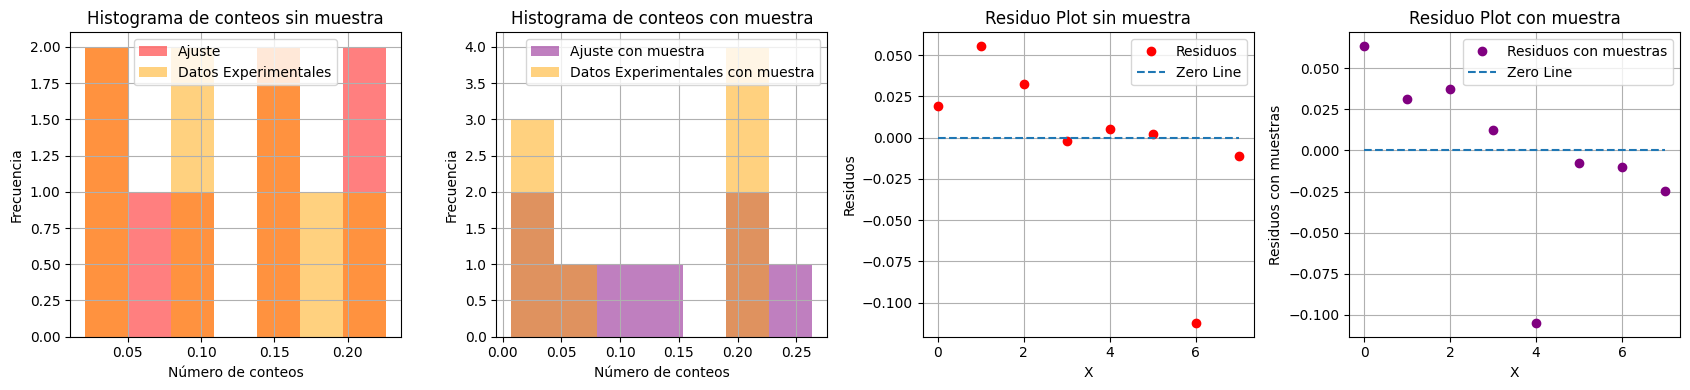

In [162]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(17, 4))

axs[0].hist(yaj, nbin, range=(ymin, ymax), alpha=0.5, label='Ajuste', color='red')
axs[0].hist(y/sum(y), nbin, range=(ymin, ymax), alpha=0.5, label='Datos Experimentales', color='orange')
axs[0].set_xlabel('Número de conteos')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de conteos sin muestra')
axs[0].legend(loc='best')
axs[0].grid(True)

axs[1].hist(yajm, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste con muestra', color='purple')
axs[1].hist(ym/sum(ym), nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales con muestra', color='orange')
axs[1].set_xlabel('Número de conteos')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de conteos con muestra')
axs[1].legend(loc='best')
axs[1].grid(True)

axs[2].plot(x, yres, 'o', label='Residuos', color='red')
axs[2].plot(x, yz, linestyle='--', label='Zero Line')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Residuos')
axs[2].set_title('Residuo Plot sin muestra')
axs[2].legend(loc='best')
axs[2].grid(True)

axs[3].plot(xm, yresm, 'o', label='Residuos con muestras', color='purple')
axs[3].plot(xm, yzm, linestyle='--', label='Zero Line')
axs[3].set_xlabel('X')
axs[3].set_ylabel('Residuos con muestras')
axs[3].set_title('Residuo Plot con muestra')
axs[3].legend(loc='best')
axs[3].grid(True)

plt.tight_layout()

plt.show()